In [71]:
# 데이터 분석 패키지
import numpy as np
import pandas as pd

In [72]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 50)  # None으로 설정하면 모든 행 출력

In [73]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# matplotlib 한글지원 패키지
import koreanize_matplotlib

In [75]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime
# 오늘 날짜 구하기
today = datetime.datetime.today()
today = today.strftime('%Y-%m-%d')
today

'2024-12-13'

In [76]:
df_etfs = pd.read_csv(f'etf_{today}.csv')

In [77]:
df_etfs.shape

(930, 12)

In [78]:
df_etfs.head()

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,KODEX CD금리액티브(합성),1056985,2,95,0.01,1057017.0,0.8251,36376,38448,93049
1,357870,6,TIGER CD금리투자KIS(합성),55400,2,5,0.01,55395.0,0.8098,18863,1044,69345
2,360750,4,TIGER 미국S&P500,21625,5,-50,-0.23,21588.0,17.0672,366127,7914,62799
3,69500,1,KODEX 200,32960,5,-10,-0.03,33031.0,-3.8692,594313,19562,56114
4,423160,6,KODEX KOFR금리액티브(합성),108935,2,25,0.02,108902.0,0.8005,6236,679,44412


In [79]:
# 거래량 기준으로 상위 10개 데이터 가져오기
df_etfs.sort_values('Volume', ascending=False).head(10)

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
30,252670,3,KODEX 200선물인버스2X,2440,5,-5,-0.20,2446.0,7.7092,17367455,42573,11419
136,251340,3,KODEX 코스닥150선물인버스,4075,2,5,0.12,4090.0,4.6272,6973753,28529,2209
19,233740,3,KODEX 코스닥150레버리지,7020,2,25,0.36,7040.0,-14.1191,3938672,27452,17775
65,114800,3,KODEX 인버스,4660,2,5,0.11,4660.0,4.6067,2759401,12881,5522
12,122630,3,KODEX 레버리지,14765,5,-35,-0.24,14836.0,-9.4248,1706497,25112,24635
28,229200,1,KODEX 코스닥150,11555,5,-25,-0.22,11553.0,-4.9652,1034472,11920,11919
149,462330,2,KODEX 2차전지산업레버리지,1496,5,-31,-2.03,1510.0,-37.5461,817606,1216,2002
105,364980,2,TIGER 2차전지TOP10,9165,5,-45,-0.49,9200.0,-17.2135,756796,6925,3217
151,496080,1,TIGER 코리아밸류업,9505,2,10,0.11,9523.0,NaN,711498,6736,2001
3,69500,1,KODEX 200,32960,5,-10,-0.03,33031.0,-3.8692,594313,19562,56114


In [80]:
# 등락율 기준으로 상위 10개 데이터 가져오기
df_etfs.sort_values('ChangeRate', ascending=False).head(10)

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
804,459370,4,SOL 유럽탄소배출권선물인버스ICE(H),12490,2,435,3.61,12488.0,-5.0414,354,4,62
598,300610,2,TIGER K게임,7655,2,240,3.24,7671.0,3.3449,5565,42,130
814,442580,4,PLUS 글로벌HBM반도체,17210,2,500,2.99,16511.0,1.4571,1,0,60
910,243890,2,TIGER 200에너지화학레버리지,3450,2,100,2.99,3472.0,-29.1755,1448,4,26
924,412560,2,TIGER BBIG레버리지,2080,2,60,2.97,2066.0,-2.8847,137,0,17
437,475050,2,ACE KPOP포커스,8470,2,220,2.67,8489.0,35.3568,47724,400,292
421,300640,2,RISE 게임테마,9010,2,230,2.62,9040.0,4.0284,465,4,320
902,334700,5,RISE 팔라듐선물인버스(H),5870,2,140,2.44,5912.0,-1.8836,462,2,29
320,395290,2,HANARO Fn K-POP&미디어,7140,2,165,2.37,7158.0,25.4496,6736,47,596
272,228810,2,TIGER 미디어컨텐츠,5440,2,125,2.35,5449.0,27.0011,17694,95,875


In [81]:
# 파생열 추가 CategoryName
df_etfs['CategoryName'] = df_etfs['Category']

# df_etfs['CategoryName'] 코드명으로 변경
# 1.국내 시장지수 2.국내 업종/테마 3.국내파생 4.해외주식 5.원자재 6.채권 7.기타
category_decode = ['국내 시장지수','국내 업종/테마','국내파생','해외주식','원자재','채권','기타']
df_etfs['CategoryName'] = df_etfs['CategoryName'].replace([ i+1 for i in range(7)],category_decode)

In [82]:
df_etfs.head(1)

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,CategoryName
0,459580,6,KODEX CD금리액티브(합성),1056985,2,95,0.01,1057017.0,0.8251,36376,38448,93049,채권


In [83]:
df_etfs.columns.tolist()

['Symbol',
 'Category',
 'Name',
 'Price',
 'RiseFall',
 'Change',
 'ChangeRate',
 'NAV',
 'EarningRate',
 'Volume',
 'Amount',
 'MarCap',
 'CategoryName']

### 파생열 추가하기

#### 1) 카테고리명

In [84]:
# 데이터 프레임의 열 위치 바꾸는 방법
# case1) 열 재배지
columns = ['Symbol', 'Category', 'CategoryName', 'Name', 'Price', 'RiseFall', 'Change', 'ChangeRate', 'NAV', 'EarningRate', 'Volume', 'Amount', 'MarCap']
df_etfs = df_etfs[columns]
# case2) insert('삽입위치','열이름','값') 메소드
# df_etfs.insert?
# df_etfs.insert(2,'CategoryName',df_etfs.pop('CategoryName'))
# case3) reindex() 메소드
# df_etfs.reindex?
# df_etfs = df_etfs.reindex(columns = columns)

In [85]:
df_etfs.head(1)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,채권,KODEX CD금리액티브(합성),1056985,2,95,0.01,1057017.0,0.8251,36376,38448,93049


#### 2) 브랜드 

In [86]:
# df_etfs['Name'].str.split?
df_etfs['Brand'] = df_etfs['Name'].str.split(' ').map(lambda list:list[0])

In [87]:
df_etfs.head(1)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand
0,459580,6,채권,KODEX CD금리액티브(합성),1056985,2,95,0.01,1057017.0,0.8251,36376,38448,93049,KODEX


In [88]:
# 브랜드별 차지비중 보기
# df['컬럼명' ].value_counts() : 특정 컬럼의 고유값의 개수를 계산
# df['컬럼명' ].value_counts(normalize=True) : 특정 컬럼의 고유값의 개수를 계산하고 각 값의 비율을 반환
df_etfs['Brand'].value_counts(normalize=True)

Brand
KODEX         0.216129
TIGER         0.213978
RISE          0.126882
ACE           0.097849
PLUS          0.069892
HANARO        0.058065
SOL           0.056989
KOSEF         0.048387
히어로즈          0.016129
TIMEFOLIO     0.013978
WON           0.012903
KoAct         0.009677
1Q            0.008602
에셋플러스         0.008602
파워            0.005376
BNK           0.005376
UNICORN       0.004301
HK            0.004301
마이다스          0.003226
FOCUS         0.003226
KCGI          0.003226
마이티           0.003226
DAISHIN343    0.002151
VITA          0.002151
TRUSTON       0.002151
TREX          0.002151
ITF           0.001075
Name: proportion, dtype: float64

In [89]:
df_etfs['Brand'].value_counts(normalize=True).map(lambda x:f'{x*100:.2f}%')

Brand
KODEX         21.61%
TIGER         21.40%
RISE          12.69%
ACE            9.78%
PLUS           6.99%
HANARO         5.81%
SOL            5.70%
KOSEF          4.84%
히어로즈           1.61%
TIMEFOLIO      1.40%
WON            1.29%
KoAct          0.97%
1Q             0.86%
에셋플러스          0.86%
파워             0.54%
BNK            0.54%
UNICORN        0.43%
HK             0.43%
마이다스           0.32%
FOCUS          0.32%
KCGI           0.32%
마이티            0.32%
DAISHIN343     0.22%
VITA           0.22%
TRUSTON        0.22%
TREX           0.22%
ITF            0.11%
Name: proportion, dtype: object

In [90]:
df_etfs.plot?

Signature:      df_etfs.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x000002802686D160>
File:           d:\kdt_2\anaconda3\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
 

Text(0.5, 1.0, '브랜드 비중')

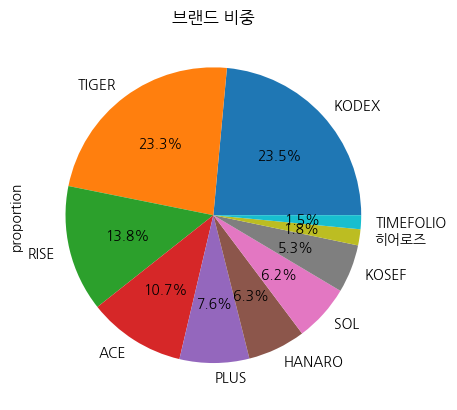

In [91]:
df_etfs['Brand'].value_counts(normalize=True).sort_values(ascending=False).head(10).plot(kind='pie',autopct='%1.1f%%')
plt.title('브랜드 비중')

#### 인버스 비중

In [92]:
# 인버스 상품 가져오기
df_etfs[df_etfs['Name'].str.contains('인버스')].head(3)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand
30,252670,3,국내파생,KODEX 200선물인버스2X,2440,5,-5,-0.20,2446.0,7.7092,17367455,42573,11419,KODEX
65,114800,3,국내파생,KODEX 인버스,4660,2,5,0.11,4660.0,4.6067,2759401,12881,5522,KODEX
136,251340,3,국내파생,KODEX 코스닥150선물인버스,4075,2,5,0.12,4090.0,4.6272,6973753,28529,2209,KODEX


In [93]:
# 인버스상품과 아닌 상품의 비율구하기
df_etfs['인버스'] = df_etfs['Name'].str.contains('인버스')
df_etfs['인버스'].value_counts(normalize=True)*100

인버스
False    95.268817
True      4.731183
Name: proportion, dtype: float64

In [94]:
# 레버리지 상품과 아닌 상품의 비율구하기
df_etfs['레버리지'] = df_etfs['Name'].str.contains('레버리지')
df_etfs['레버리지'].value_counts(normalize=True)*100

레버리지
False    94.83871
True      5.16129
Name: proportion, dtype: float64

In [95]:
# 헤지 상품과 아닌 상품의 비율구하기
df_etfs['헤지'] = df_etfs['Name'].str.endswith('(H)')
df_etfs['헤지'].value_counts(normalize=True)*100

헤지
False    93.225806
True      6.774194
Name: proportion, dtype: float64

In [96]:
df_etfs.head(2)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지
0,459580,6,채권,KODEX CD금리액티브(합성),1056985,2,95,0.01,1057017.0,0.8251,36376,38448,93049,KODEX,False,False,False
1,357870,6,채권,TIGER CD금리투자KIS(합성),55400,2,5,0.01,55395.0,0.8098,18863,1044,69345,TIGER,False,False,False


In [97]:
df_etfs[df_etfs['레버리지']]

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지
12,122630,3,국내파생,KODEX 레버리지,14765,5,-35,-0.24,14836.0,-9.4248,1706497,25112,24635,KODEX,False,True,False
19,233740,3,국내파생,KODEX 코스닥150레버리지,7020,2,25,0.36,7040.0,-14.1191,3938672,27452,17775,KODEX,False,True,False
125,423920,4,해외주식,TIGER 미국필라델피아반도체레버리지(합성),24765,2,535,2.21,24015.0,14.6873,23385,575,2311,TIGER,False,True,False
139,409820,4,해외주식,KODEX 미국나스닥100레버리지(합성 H),13010,3,0,0.00,12881.0,24.7363,11363,147,2160,KODEX,False,True,False
149,462330,2,국내 업종/테마,KODEX 2차전지산업레버리지,1496,5,-31,-2.03,1510.0,-37.5461,817606,1216,2002,KODEX,False,True,False
225,418660,4,해외주식,TIGER 미국나스닥100레버리지(합성),27205,2,85,0.31,26896.0,44.2553,4586,124,1170,TIGER,False,True,False
248,204480,4,해외주식,TIGER 차이나CSI300레버리지(합성),19910,5,-250,-1.24,20407.0,74.1684,1352,26,1027,TIGER,False,True,False
269,465610,4,해외주식,ACE 미국빅테크TOP7 Plus레버리지(합성),29905,5,-135,-0.45,29551.0,61.1587,11345,338,897,ACE,False,True,False
280,452250,6,채권,ACE 미국30년국채선물레버리지(합성 H),6120,5,-90,-1.45,6121.0,-17.4751,21861,133,820,ACE,False,True,False
286,412570,2,국내 업종/테마,TIGER 2차전지TOP10레버리지,1636,5,-14,-0.85,1652.0,-34.7827,262790,426,770,TIGER,False,True,False


In [98]:
file_name = f'new_etf_{today}.csv'
file_name

'new_etf_2024-12-13.csv'

In [99]:
df_etfs.to_csv(file_name, index=False)